In [49]:
#from manage_data import get_datasets
# from manage_data import plot_coefficients_linSVC
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve


In [50]:
def plot_coefficients_linSVC(classifier, feature_names, top_features=20):
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(60, 20))
    colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
    plt.show()

In [51]:
def get_datasets(std_size=False):
    # My python only likes absolute paths 
    brca = pd.read_csv('C:\\Users\\sohai\\PycharmProjects\\comp3212-cancer-exploration\\data\\Gistic2_CopyNumber_BRCA', sep='\t')
    ovca = pd.read_csv('C:\\Users\sohai\\PycharmProjects\\comp3212-cancer-exploration\\data\\Gistic2_CopyNumber_OVCA', sep='\t')
    brca.set_index('Gene Symbol', inplace=True)
    ovca.set_index('Gene Symbol', inplace=True)
    brca = brca.transpose()
    ovca = ovca.transpose()
    brca['BRCA'] = 1
    ovca['BRCA'] = 0
    print('size brca, ovca', len(brca), len(ovca))
    if not std_size:
        print('normal size', len(brca)+len(ovca))
        df = pd.concat([brca, ovca[1:]])
    elif std_size:
        print('sampled size', len(ovca)+len(ovca))
        df = pd.concat([brca[0:len(ovca)], ovca[1:]])
    print(len(df), len(brca.transpose()-2) + len(ovca.transpose()-2))
    return df

df = get_datasets()
y = df['BRCA']
X = df.drop('BRCA', axis=1)

size brca, ovca 1080 579
normal size 1659
1658 49554


In [52]:
df.head()

,ACAP3,ACTRT2,AGRN,ANKRD65,ATAD3A,ATAD3B,ATAD3C,AURKAIP1,B3GALT6,C1orf159,...,SNORA36A,SNORA56,TMLHE,VBP1,IL9R|ENSG00000124334.12,SPRY3|ENSG00000168939.6,VAMP7|ENSG00000124333.10,WASH6P|ENSG00000182484.10,WASIR1|ENSG00000185203.7,BRCA
TCGA-3C-AAAU-01,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,0.069,...,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,-0.395,1
TCGA-3C-AALI-01,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,-1.008,...,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,-0.504,1
TCGA-3C-AALJ-01,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,-0.330,...,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,-0.063,1
TCGA-3C-AALK-01,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,-0.023,...,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,0.008,1
TCGA-4H-AAAK-01,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,-0.020,1


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33,random_state = 42)

scaler = StandardScaler()
normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
normalised_x_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns)

svc_unnorm = SVC(kernel='linear')
svc_unnorm.fit(X_train, y_train)
un_score = svc_unnorm.score(X_test, y_test)

svc_norm = SVC(kernel='linear')
svc_norm.fit(normalized_x_train, y_train)
nm_score = svc_norm.score(normalised_x_test, y_test)
print('unnormalised score =', un_score)
print('scaled score =', nm_score)

unnormalised score = 0.916058394160584
scaled score = 0.9051094890510949


24776
(1.2039889838381717e-07, 1.2187804690193933e-07, 8.212546516438504e-07, 8.226630577531382e-07, 8.760555089082542e-07, 2.422355286397544e-06, 2.422355286397544e-06, 2.423594250145045e-06, 2.5006142112480407e-06, 2.524774529968424e-06, 3.5938504937430587e-06, 4.029589662834535e-06, 4.034275553537884e-06, 4.034275553537884e-06, 4.5962397448784345e-06, 4.760374719837148e-06, 5.0755903937536894e-06, 5.752282394207555e-06, 5.830278781422277e-06, 5.834347078497273e-06, 5.834927531355247e-06, 5.8382033748624845e-06, 7.599601637478534e-06, 7.615590237060135e-06, 7.65699817704428e-06, 7.746004150129391e-06, 8.084041364737122e-06, 8.45356225051928e-06, 8.731061569532923e-06, 9.448865642985395e-06, 9.88904792858451e-06, 9.968933883904888e-06, 1.0655023399396821e-05, 1.1414047127229971e-05, 1.188513909132829e-05, 1.2245379222078007e-05, 1.295939899153332e-05, 1.3077717825748485e-05, 1.3254452472643131e-05, 1.3270474629041674e-05, 1.3956362477691244e-05, 1.4053139633011814e-05, 1.4173273133057

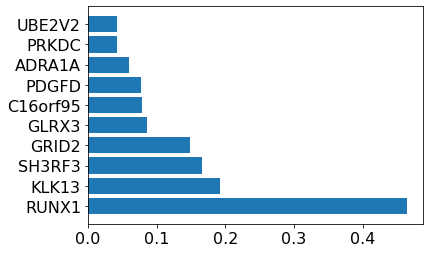

In [75]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    print(imp)
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

features_names = list(X_train.columns)

print(len(features_names))
f_importances(abs(svc_norm.coef_[0]), features_names, top=10)

In [54]:
x = 0.9999
pca = PCA(n_components=x)
pca.fit(X_train)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (1658, 24776)
transformed shape: (1658, 997)


In [64]:
y_red = pd.Series(y)

df_redd = pd.DataFrame(X_pca)
svc_reddim = SVC(probability=True,kernel='linear')
# y_red
X_traind, X_testd, y_traind, y_testd = train_test_split(df_redd, y)
svc_reddim.fit(X_traind, y_traind)
svc_reddim.score(X_testd, y_testd)

0.9301204819277108

In [81]:
from sklearn.metrics import confusion_matrix
import itertools

# Making the new split given the PCA
X_train, X_test, y_train, y_test = train_test_split(df_redd, y)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [82]:
def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, predictions)
    results['precision'] = precision_score(y_test, predictions)
    results['roc'] = roc_auc_score(y_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [83]:
train_rf_predictions = svc_reddim.predict(X_train)
train_rf_probs = svc_reddim.predict_proba(X_train)[:, 1]

rf_predictions = svc_reddim.predict(X_test)
rf_probs = svc_reddim.predict_proba(X_test)[:, 1]


,0,1,2,3,4,5,6,7,8,9,...,987,988,989,990,991,992,993,994,995,996
1636,34.224662,13.343473,-4.263979,-0.758724,-12.031512,-9.082249,-0.633288,-1.910663,-10.820681,25.761217,...,-0.006850,0.003455,-0.044709,0.054495,0.001282,0.003295,-0.020428,0.035725,0.002970,0.016895
359,-35.233058,14.874733,-0.325086,-2.903690,-11.203145,30.548690,23.822062,16.393735,-2.879449,23.924871,...,0.014642,-0.008382,0.017588,-0.007131,-0.008405,0.013010,0.024570,-0.010677,-0.024684,0.008327
1025,1.414864,13.502394,6.142885,-4.131694,-7.039511,-13.437585,16.175862,-1.978494,-6.248098,14.817834,...,-0.010184,0.005211,0.042049,0.024973,-0.013093,0.020591,0.012381,-0.009868,0.001472,-0.005977
888,-31.163537,-5.966180,-13.208403,4.563054,0.724726,-1.123512,-12.548571,14.047130,11.780838,-3.918392,...,-0.369186,0.113030,0.036444,-0.382507,0.159897,-0.197752,0.100615,0.001062,-0.181620,-0.140881
960,0.704193,-24.176533,6.438277,-8.398452,-3.289978,0.343354,0.464258,-7.095599,-0.949517,0.674995,...,-0.126247,-0.211256,-0.036490,-0.050216,0.037126,0.046041,0.250673,-0.126804,-0.357559,-0.262069
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,20.599263,8.989741,33.064330,5.469793,-3.396843,-0.115637,1.688389,25.973987,1.852664,-1.639023,...,-0.001396,0.020852,-0.029355,0.012600,-0.007780,-0.019786,0.004833,-0.027504,0.001905,0.009936
1113,35.354738,-30.451230,-4.876602,8.879377,-1.668255,0.266578,-5.171029,-0.618769,1.687407,-1.542952,...,0.165279,0.231750,-0.124424,-0.902311,0.977127,0.043175,-0.253409,-0.247434,-0.508645,-0.329199
436,16.047354,0.959488,9.516981,3.434859,-16.869543,3.254624,5.333730,-11.799124,-3.278011,-8.532580,...,-0.022283,0.021411,-0.007256,-0.004716,0.019688,-0.006021,-0.014694,0.003860,0.025329,0.006992
588,-20.039677,20.448692,-11.371204,9.928240,-10.801663,21.190561,27.385130,0.298488,-4.233490,6.388242,...,-1.026914,0.087967,0.562339,0.656196,0.658261,-0.570158,1.764346,0.239765,1.042267,-0.295646


Recall Baseline: 1.0 Test: 0.99 Train: 0.99
Precision Baseline: 0.66 Test: 0.97 Train: 0.98
Roc Baseline: 0.5 Test: 0.99 Train: 1.0


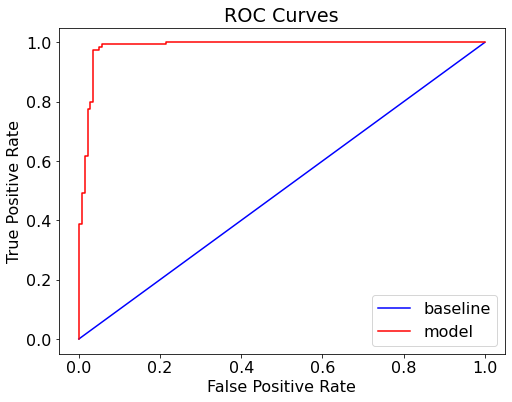

In [84]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)


Confusion matrix, without normalization
[[132   8]
 [  2 273]]


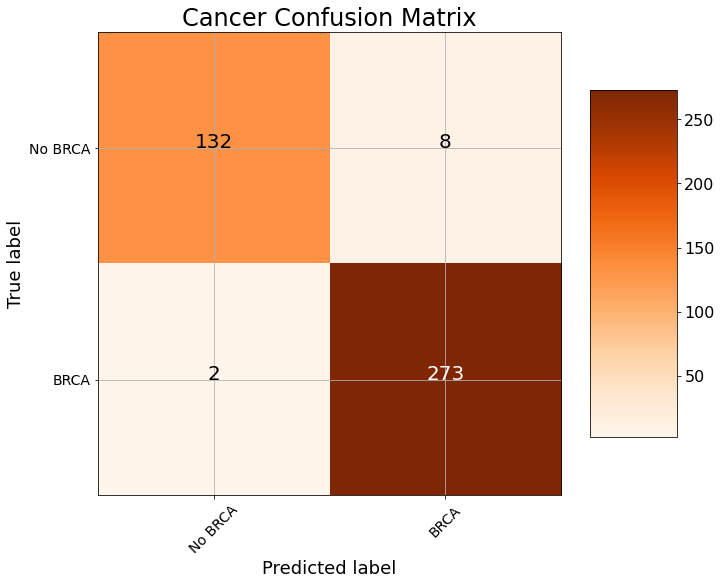

In [85]:
cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(cm, classes = ['No BRCA', 'BRCA'],
                      title = 'Cancer Confusion Matrix')

997
(5.558087614651397e-05, 7.356961131042791e-05, 8.282319088851999e-05, 0.00014721730566268933, 0.00016511520218426357, 0.00019477013385650805, 0.00028807779876200486, 0.0002974879378470806, 0.00046766869339697425, 0.0004834945597859463, 0.0005586124842661228, 0.0006052024483342897, 0.000667968596903718, 0.0006838514747700117, 0.0007535198885105004, 0.0008184958282603806, 0.0008490304933126192, 0.0009112900393004426, 0.0009619518392356459, 0.001009663909333124, 0.0010118885382232607, 0.001040326791103087, 0.0011480076309559096, 0.0011585879616373659, 0.0012155912952398838, 0.0012739874499012327, 0.0013164760125262377, 0.0013233069066329757, 0.001380389893613023, 0.0015015818213276746, 0.0015461643272236968, 0.0015962106210290039, 0.001614245210698711, 0.0016205752157193065, 0.0016316556857752667, 0.0016915802516684368, 0.0017091072542950601, 0.0017149903277089782, 0.0017192750438546184, 0.0017321947939132722, 0.0017556302558834962, 0.0017996657367952498, 0.0018111527112822197, 0.0018

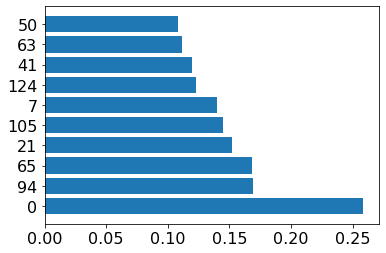

In [76]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)
    print(imp)
    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

features_names = list(X_traind.columns)

print(len(features_names))
f_importances(abs(svc_reddim.coef_[0]), features_names, top=10)
